In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/')

In [3]:
from image_transformer import ImageTransformer
from collections import Counter
from IPython.display import clear_output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [4]:
f = open('/content/drive/MyDrive/tcga_gene_expected_count')
samples = f.readline()
samples = samples.split('\t')

In [5]:
sample_count = len(samples[1:])

In [6]:
g = open('/content/drive/MyDrive/TCGA_phenotype_denseDataOnlyDownload.tsv')
g.readline()
_dict_type ={}
_dict_subtype ={}
for line in g:
    fileds = line.split('\t')
    _dict_type[fileds[0].strip()] = fileds[3].strip()
    _dict_subtype[fileds[0].strip()] = fileds[2].strip()

In [7]:
phenotypes = []
for s in samples[1:]:
    if s.strip() not in _dict_type.keys():
        phenotypes.append('NA')
    else:
        phenotypes.append(_dict_type[s.strip()])

In [8]:
subphenotypes = []
for s in samples[1:]:
    if s.strip() not in _dict_subtype.keys():
        subphenotypes.append('NA')
    else:
        subphenotypes.append(_dict_subtype[s.strip()])

In [9]:
Counter(phenotypes)

Counter({'glioblastoma multiforme': 171,
         'brain lower grade glioma': 523,
         'liver hepatocellular carcinoma': 421,
         'cervical & endocervical cancer': 308,
         'lung adenocarcinoma': 574,
         'colon adenocarcinoma': 330,
         'acute myeloid leukemia': 173,
         'breast invasive carcinoma': 1212,
         'esophageal carcinoma': 195,
         'sarcoma': 264,
         'kidney papillary cell carcinoma': 321,
         'stomach adenocarcinoma': 449,
         'prostate adenocarcinoma': 546,
         'skin cutaneous melanoma': 470,
         'uterine corpus endometrioid carcinoma': 204,
         'head & neck squamous cell carcinoma': 564,
         'kidney clear cell carcinoma': 603,
         'lung squamous cell carcinoma': 548,
         'thymoma': 121,
         'thyroid carcinoma': 571,
         'mesothelioma': 87,
         'rectum adenocarcinoma': 103,
         'pancreatic adenocarcinoma': 183,
         'ovarian serous cystadenocarcinoma': 427,
       

In [10]:
gen_count = 0
for line in f:
    fileds = line.split('\t')
    values = [float(x.strip()) for x in fileds[1:]]
    values = np.asarray(values)
    if values.mean() >= 0.1:
      gen_count +=1
    clear_output(wait=True)
    print(gen_count)
f.close()

40048


In [11]:
data = np.zeros((gen_count , sample_count), dtype='float64')

In [12]:
f = open('/content/drive/MyDrive/tcga_gene_expected_count')
f.readline()
i = 0
gene_list = []
for line in f:
    fileds = line.split('\t')
    values = [float(x.strip()) for x in fileds[1:]]
    values = np.asarray(values)
    if values.mean() >= 0.1:
      data[i] = values
      gene_list.append(fileds[0])
      i += 1
    print(i)
    clear_output(wait=True)
f.close()

40048


In [13]:
data = data.T

In [14]:
print(data.shape)

(10530, 40048)


In [15]:
print(data.shape , np.min(data) , np.max(data) ,np.mean(data))

(10530, 40048) 0.0 24.3103 4.702266148948385


In [16]:
# data = (data - np.min(data)) / (np.max(data) - np.min(data))

In [17]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


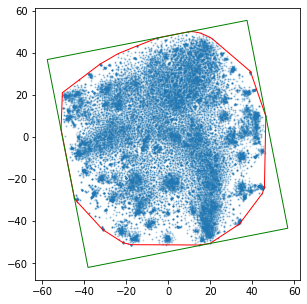

In [18]:
plt.figure(figsize=(5, 5))
it.fit(data, plot=True)

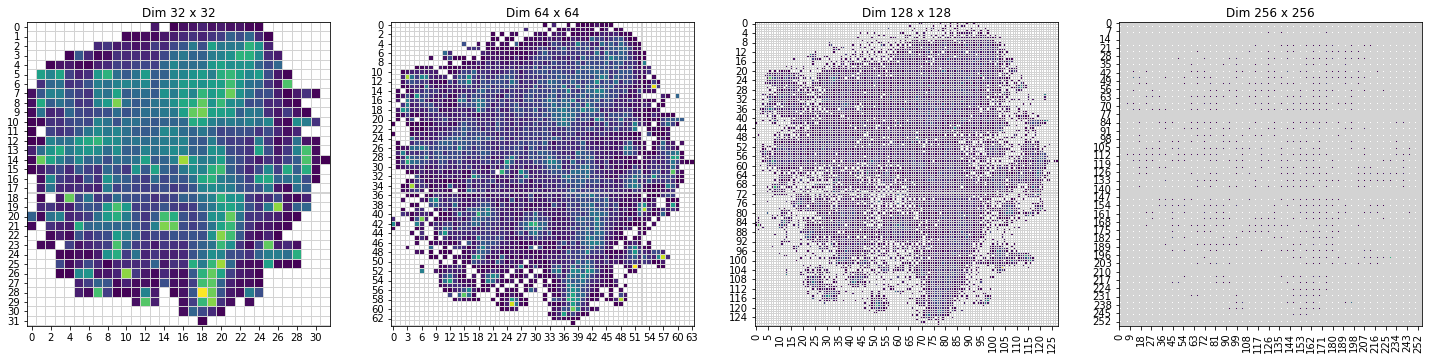

In [19]:
px_sizes = [32, 64, 128, 256]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)




In [20]:
it.pixels = 128

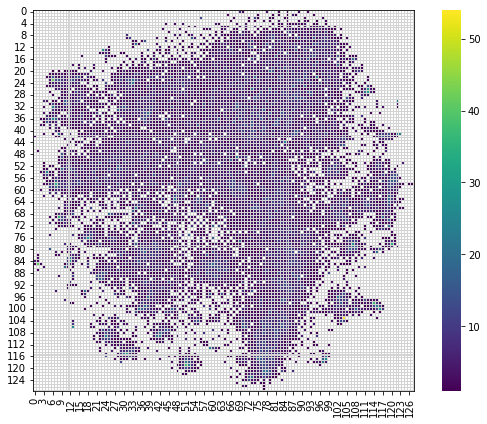

In [21]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)


In [22]:
it._coords[0]

array([64, 28])

In [23]:
dataset = np.zeros((data.shape[0],128,128), dtype='float32')

In [24]:
for i in range(data.shape[0]):
  dataset[i] = it.transform(data[i,:], format='scalar')

In [25]:
dataset = np.expand_dims(dataset , axis=-1)

In [26]:
dataset.shape

(10530, 128, 128, 1)

In [27]:
np.save('/content/drive/MyDrive/data.npy' ,dataset )

In [28]:
f = open('/content/drive/MyDrive/types.txt','w')
for x in phenotypes:
  f.write(x+'\n')
f.close()

In [29]:
f = open('/content/drive/MyDrive/subtypes.txt','w')
for x in subphenotypes:
  f.write(x+'\n')
f.close()

In [30]:
f = open('/content/drive/MyDrive/gene_list.txt','w')
for g in gene_list:
  f.write(g+'\n')
f.close()

In [31]:
np.save('/content/drive/MyDrive/coords.npy' ,it._coords )

In [32]:
data = data * 24.3103